## Problem Statement 

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_excel("customer_churn_large_dataset.xlsx")

In [3]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
data.shape

(100000, 9)

In [5]:
data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [6]:
data.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [8]:
for i in data.columns:
    print(f" no. of unique value in {i}  is   : {data[i].nunique()}")
    print("#######################################################")
    if (data[i].nunique()) < 8:
        print(f"           unique value are : {data[i].unique()}")
        print("***************************************************")
    else:
        pass

 no. of unique value in CustomerID  is   : 100000
#######################################################
 no. of unique value in Name  is   : 100000
#######################################################
 no. of unique value in Age  is   : 53
#######################################################
 no. of unique value in Gender  is   : 2
#######################################################
           unique value are : ['Male' 'Female']
***************************************************
 no. of unique value in Location  is   : 5
#######################################################
           unique value are : ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']
***************************************************
 no. of unique value in Subscription_Length_Months  is   : 24
#######################################################
 no. of unique value in Monthly_Bill  is   : 7001
#######################################################
 no. of unique value in Total_Usage_GB  is

In [9]:
# lets create some features with the help of our existing features

feature = []
dtypes = []
count = []
unique = []
missing = []
missing_percentage=[]

for column in data.columns:
    feature.append(column)
    count.append(len(data[column]))
    missing.append(data[column].isnull().sum())
    unique.append(data[column].nunique())
    missing_percentage.append((data[column].isnull().sum() / data.shape[0]) * 100)
    dtypes.append(data[column].dtypes)
    
dataframe=pd.DataFrame({'feature':feature,
             'count':count,
             'missing':missing,
             'nunique':unique,
              'missing_percentage':missing_percentage,
              'dtypes':dtypes
              
             }) 
dataframe.set_index('feature')

,count,missing,nunique,missing_percentage,dtypes
feature,,,,,
CustomerID,100000,0,100000,0.0,int64
Name,100000,0,100000,0.0,object
Age,100000,0,53,0.0,int64
Gender,100000,0,2,0.0,object
Location,100000,0,5,0.0,object
Subscription_Length_Months,100000,0,24,0.0,int64
Monthly_Bill,100000,0,7001,0.0,float64
Total_Usage_GB,100000,0,451,0.0,int64
Churn,100000,0,2,0.0,int64


In [10]:
# Check null values in our complete dataset
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [11]:
# check duplicet value in data set
data.duplicated().sum()

0

In [12]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [13]:
# saprate catigorical and numerical features
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns

In [14]:
catigorical_features

Index(['Name', 'Gender', 'Location'], dtype='object')

In [15]:
numerical_features

Index(['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB', 'Churn'],
      dtype='object')

In [16]:
data['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

In [17]:
data['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

In [18]:
# fetch the unique value from catigorical data
for i in catigorical_features:
    print(i,data[i].unique())
    
    print()
    print("*****************************Seperated_Columns********************************")
    print()

Name ['Customer_1' 'Customer_2' 'Customer_3' ... 'Customer_99998'
 'Customer_99999' 'Customer_100000']

*****************************Seperated_Columns********************************

Gender ['Male' 'Female']

*****************************Seperated_Columns********************************

Location ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']

*****************************Seperated_Columns********************************



# Data Visualization

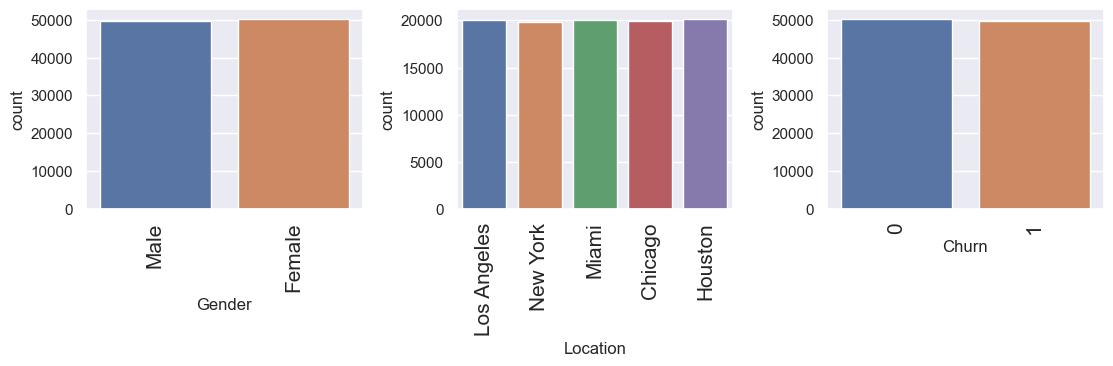

In [19]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize":(15,6)})

colmns1 = ['Gender', 'Location', 'Churn']

for i in range(0,len(colmns1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[colmns1[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

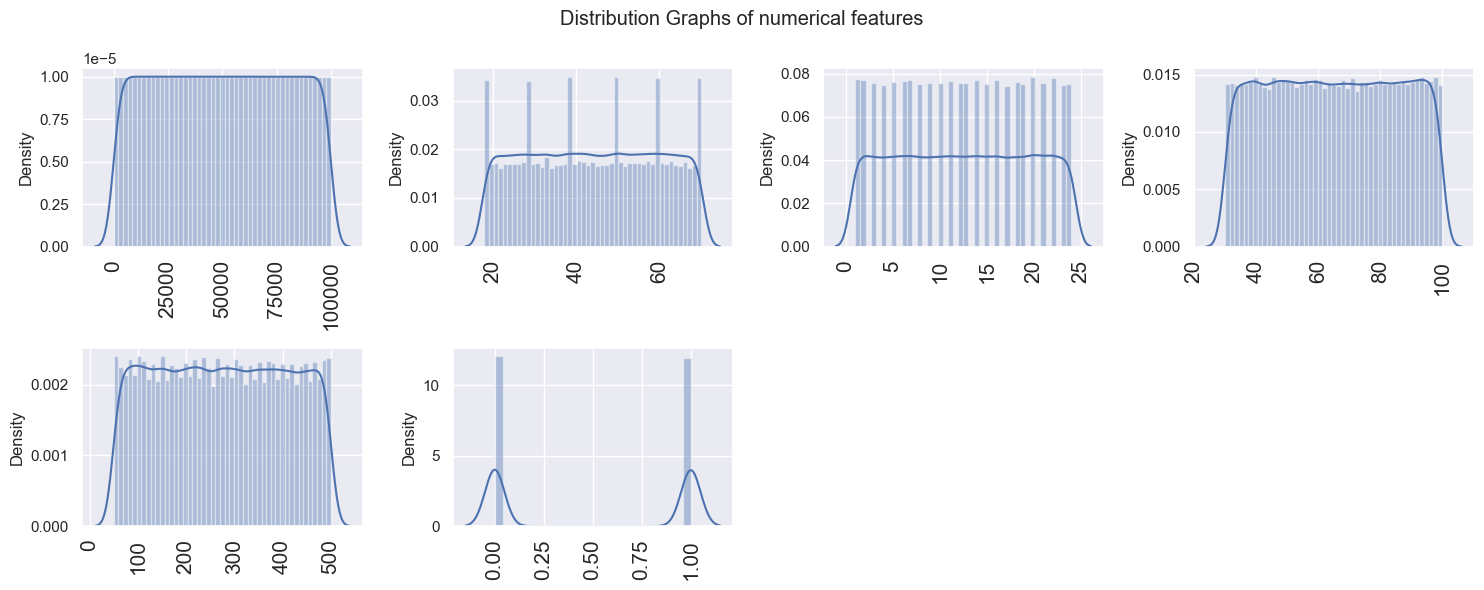

In [20]:
plt.suptitle("Distribution Graphs of numerical features")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.distplot(x=data[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

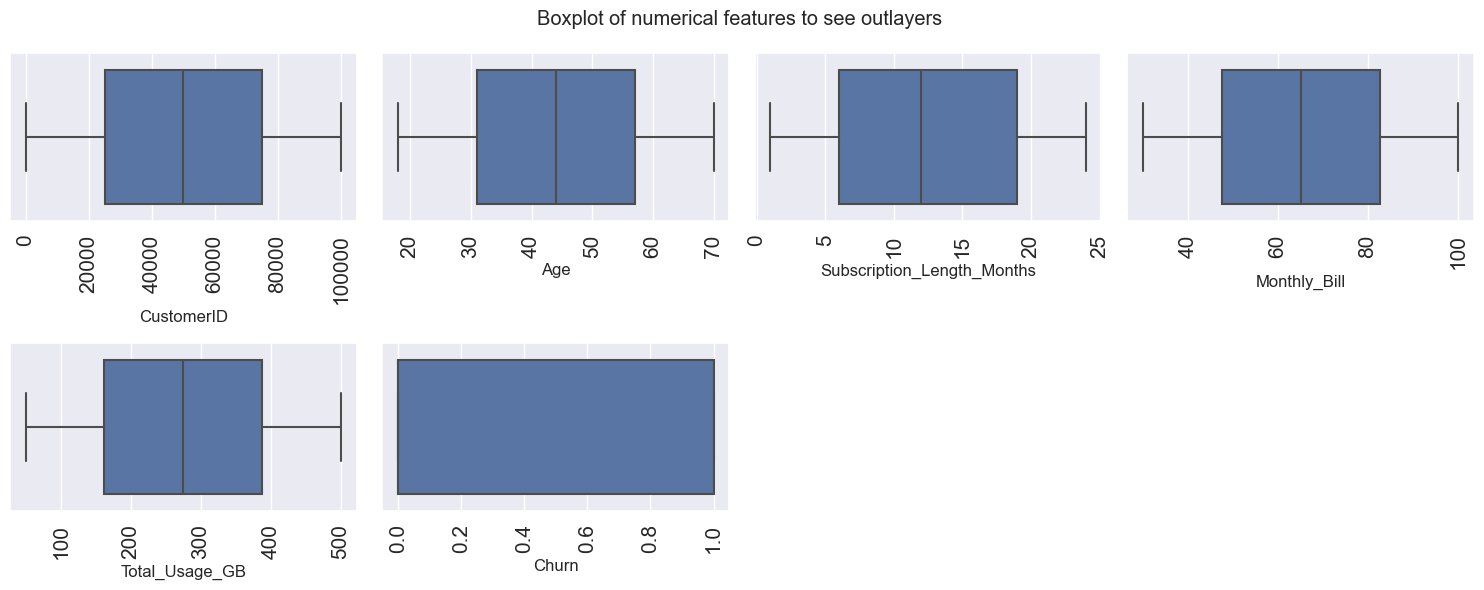

In [21]:
plt.suptitle("Boxplot of numerical features to see outlayers ")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=data[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

In [22]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


<AxesSubplot:xlabel='Churn'>

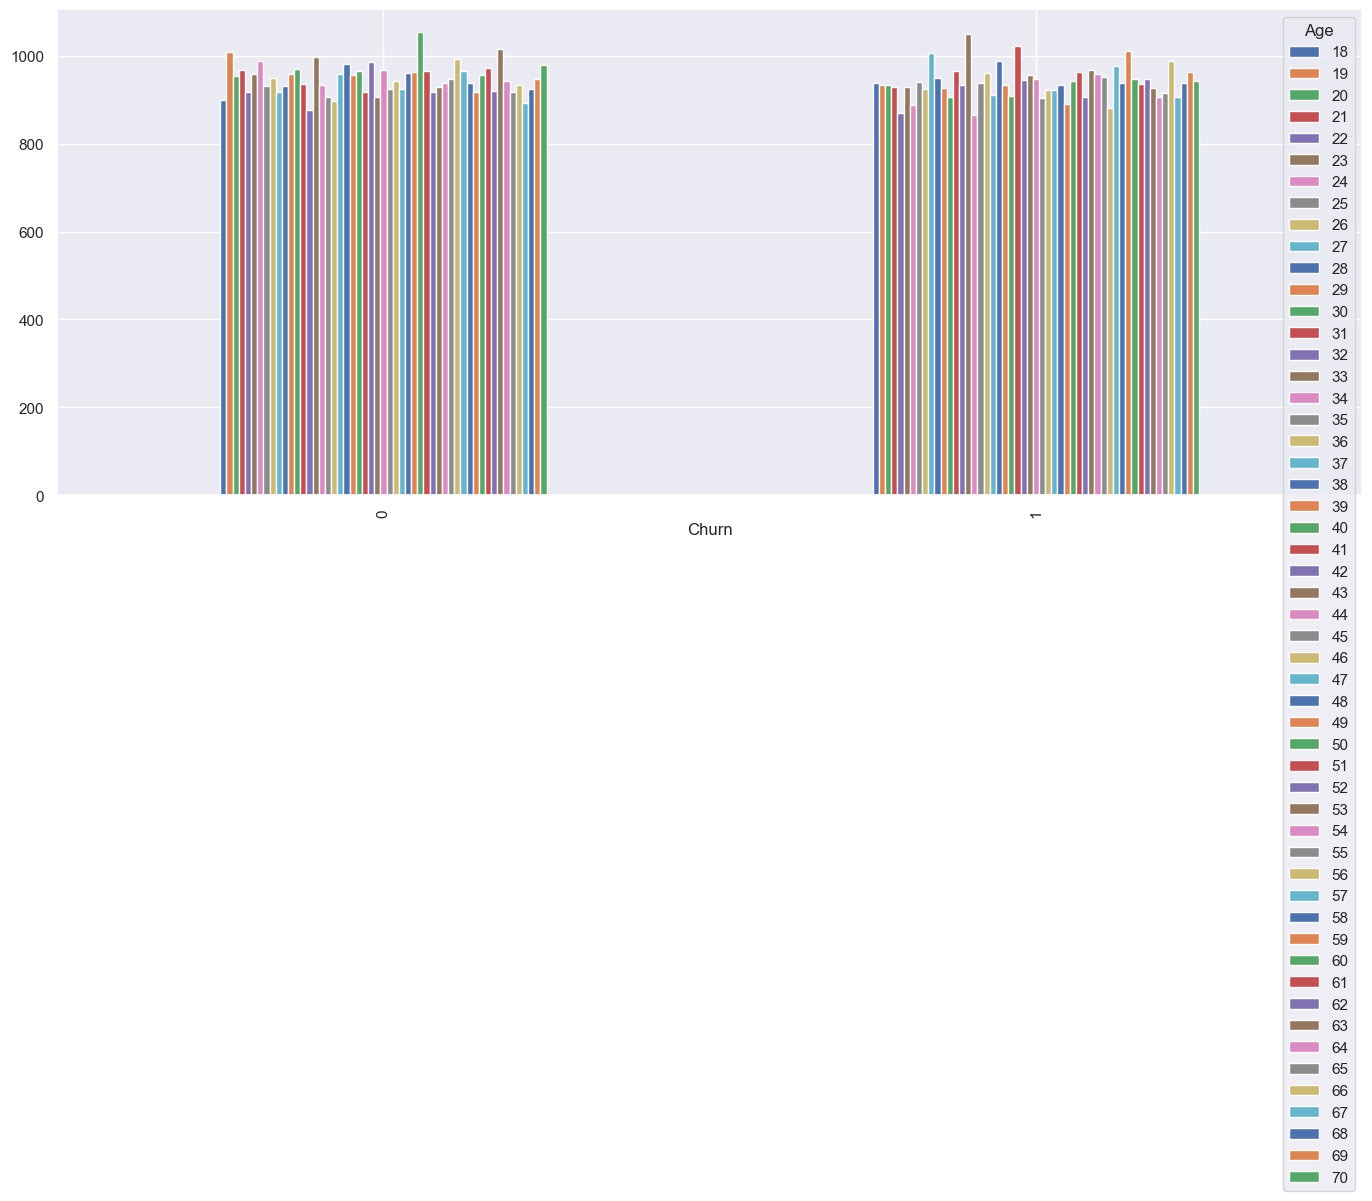

In [23]:
age = pd.crosstab(data['Churn'],data['Age'])
age.plot(kind='bar')

<AxesSubplot:xlabel='Churn'>

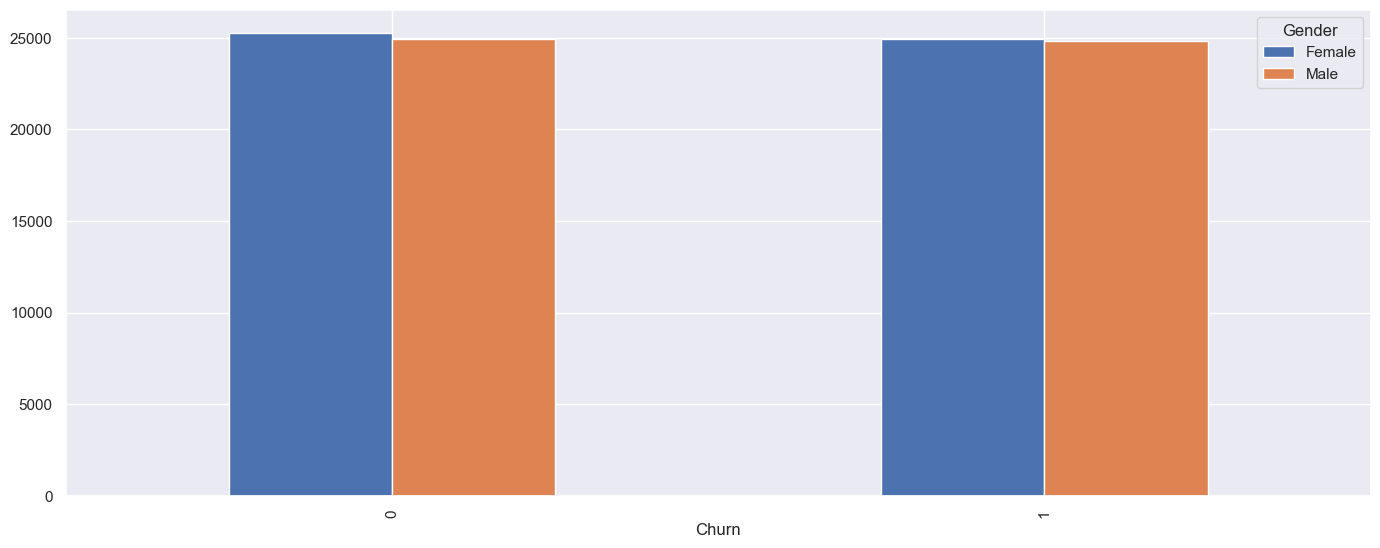

In [24]:
gender = pd.crosstab(data['Churn'],data['Gender'])
gender.plot(kind='bar')

<AxesSubplot:xlabel='Churn'>

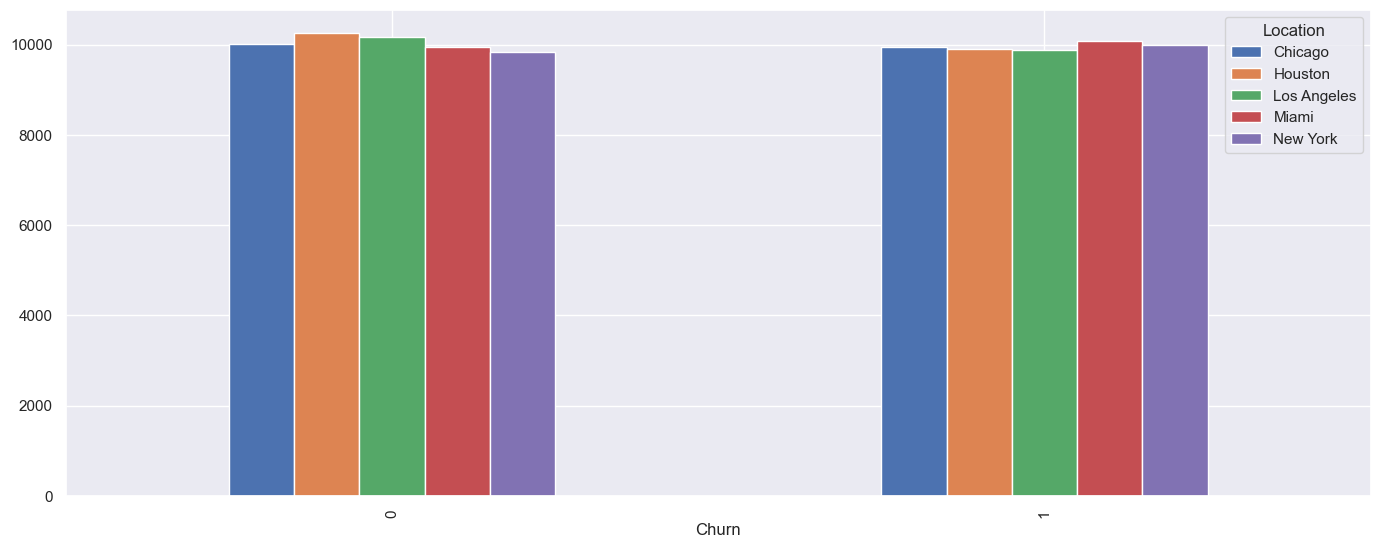

In [25]:
location = pd.crosstab(data['Churn'],data['Location'])
location.plot(kind='bar')

In [26]:
catigorical_features

Index(['Name', 'Gender', 'Location'], dtype='object')

In [27]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [28]:
data['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [29]:
X = data.drop(labels=['CustomerID','Name','Churn'],axis=1)
y = data[['Churn']]

In [30]:
X

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,Male,Los Angeles,17,73.36,236
1,62,Female,New York,1,48.76,172
2,24,Female,Los Angeles,5,85.47,460
3,36,Female,Miami,3,97.94,297
4,46,Female,Miami,19,58.14,266
...,...,...,...,...,...,...
99995,33,Male,Houston,23,55.13,226
99996,62,Female,New York,19,61.65,351
99997,64,Male,Chicago,17,96.11,251
99998,51,Female,New York,20,49.25,434


In [31]:
y

,Churn
0,0
1,0
2,0
3,1
4,0
...,...
99995,1
99996,0
99997,1
99998,1


In [32]:
categorical_column=['Gender','Location']

In [33]:
numerical_column=['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']

In [48]:
# numerical pipeline

numerical_pipeline=Pipeline(steps=[
    ('scaler',StandardScaler(with_mean=False))
])

# categorical pipeline

categorical_pipeline=Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore')),
])


In [49]:
preprocessor =ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline,numerical_column),
    ('categorical_pipeline',categorical_pipeline,categorical_column)
])

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [51]:
X_train=preprocessor.fit_transform(X_train)

In [52]:
X_test=preprocessor.transform(X_test)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV




from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay

## Use Hyperparemetertuning

In [54]:
lr = LogisticRegression()

In [55]:
lr.fit(X_train,y_train)

LogisticRegression()

In [56]:
y_pred=lr.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred)

0.50365

In [47]:
X

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,Male,Los Angeles,17,73.36,236
1,62,Female,New York,1,48.76,172
2,24,Female,Los Angeles,5,85.47,460
3,36,Female,Miami,3,97.94,297
4,46,Female,Miami,19,58.14,266
...,...,...,...,...,...,...
99995,33,Male,Houston,23,55.13,226
99996,62,Female,New York,19,61.65,351
99997,64,Male,Chicago,17,96.11,251
99998,51,Female,New York,20,49.25,434


In [59]:
xfb=XGBClassifier()

In [60]:
xfb.fit(X_train,y_train)

[10:50:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
y_p=xfb.predict(X_test)

In [62]:
accuracy_score(y_test,y_p)

0.4987

In [63]:
gb=GradientBoostingClassifier()

In [64]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [65]:
y_predict=gb.predict(X_test)

In [66]:
accuracy_score(y_test,y_predict)

0.4993